In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
654,TA,TA,350000
73,NaN,TA,144900
224,Ex,TA,386250
280,TA,TA,228500
523,Gd,TA,184750


In [4]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [5]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:>

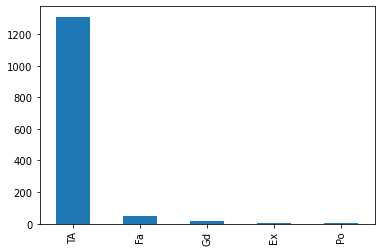

In [6]:
df['GarageQual'].value_counts().plot.bar()

In [7]:
df['GarageQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQuality')

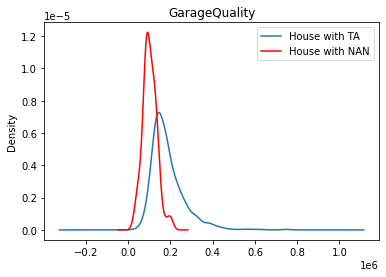

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot.kde(ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot.kde(ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with TA','House with NAN']
ax.legend(lines,labels,loc='best')

plt.title('GarageQuality')

In [15]:
temp = df[df['GarageQual']== 'TA']['SalePrice']

In [16]:
df['GarageQual'].fillna('TA',inplace=True)

<AxesSubplot:>

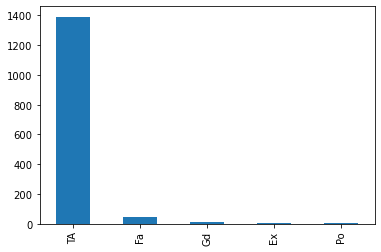

In [17]:
df['GarageQual'].value_counts().plot.bar()

### TA value is increased

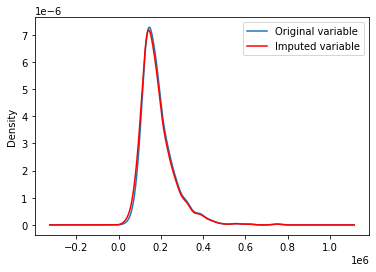

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot.kde(ax=ax)

#distribution of the varaibale after imputation
df[df['GarageQual']== 'TA']['SalePrice'].plot.kde(ax=ax,color='red')

lines,labels =ax.get_legend_handles_labels()
labels =['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')


# with firePlaceQuality column

In [21]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

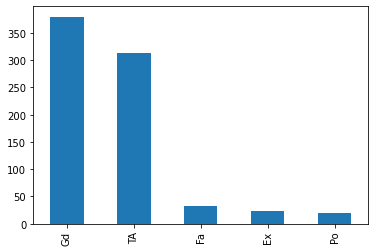

In [24]:
df['FireplaceQu'].value_counts().plot(kind='bar')

### as gd and ta is almost similar..the result will not be efficient

In [25]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FirePlaceQuality')

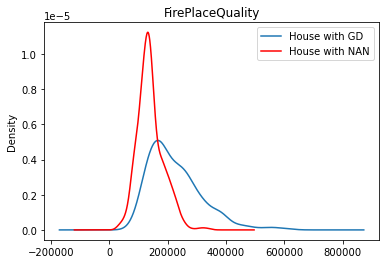

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] =='Gd']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels=['House with GD','House with NAN']

ax.legend(lines,labels,loc='best')

plt.title('FirePlaceQuality')

In [32]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [33]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<AxesSubplot:>

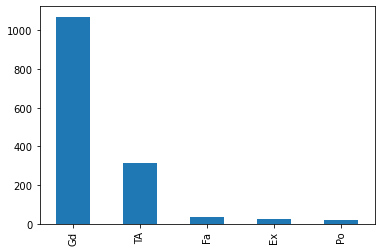

In [34]:
df['FireplaceQu'].value_counts().plot.bar()

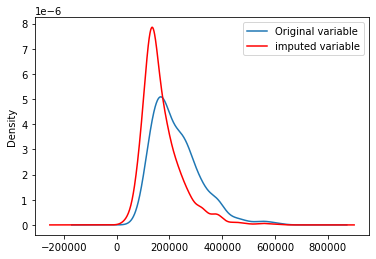

In [35]:
fig = plt.figure()
ax= fig.add_subplot(111)

temp.plot.kde(ax=ax)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot.kde(ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','imputed variable']
ax.legend(lines,labels,loc='best')

## the result is not good

# Now with sklearn


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test= train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [38]:
X_train.shape, X_test.shape

((1168, 2), (292, 2))

In [39]:
from sklearn.impute import  SimpleImputer

In [40]:
imputer = SimpleImputer(strategy='most_frequent')

In [41]:
X_train = imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [42]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [44]:
imputer.statistics_[0]

'Gd'